<a href="https://colab.research.google.com/github/Gsdvl/ClusteringAlgorithms/blob/main/ClusteringAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Sem valores nulos nem duplicatas
print(df.info())
print(df.describe())
print(df['CustomerID'].duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

In [ ]:
#Tratando os dados para aplicar o kmeans
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
x = df[['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
#Normalizando
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


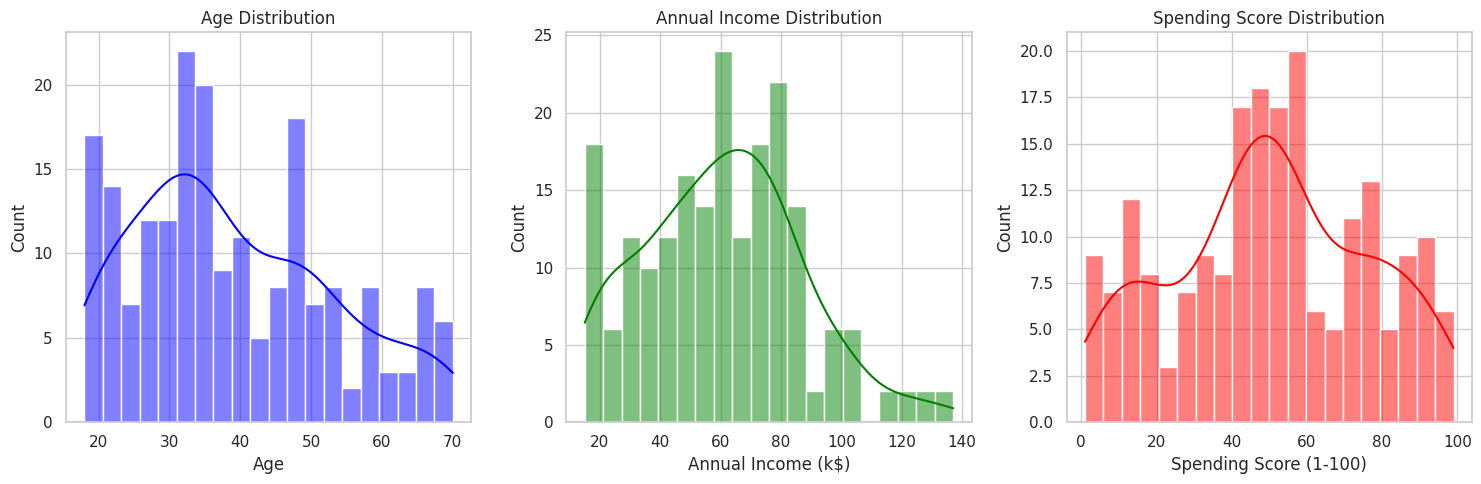

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='green')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

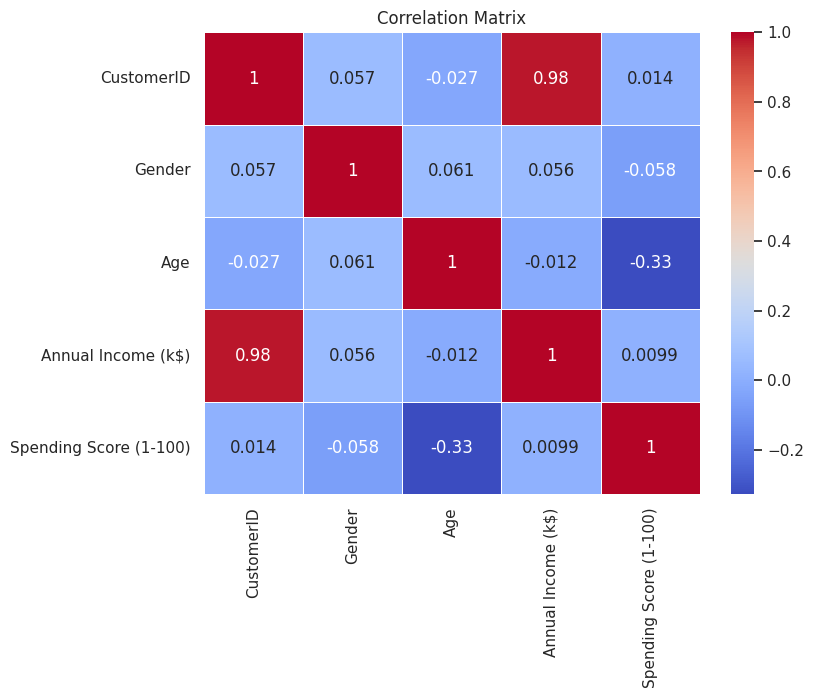

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

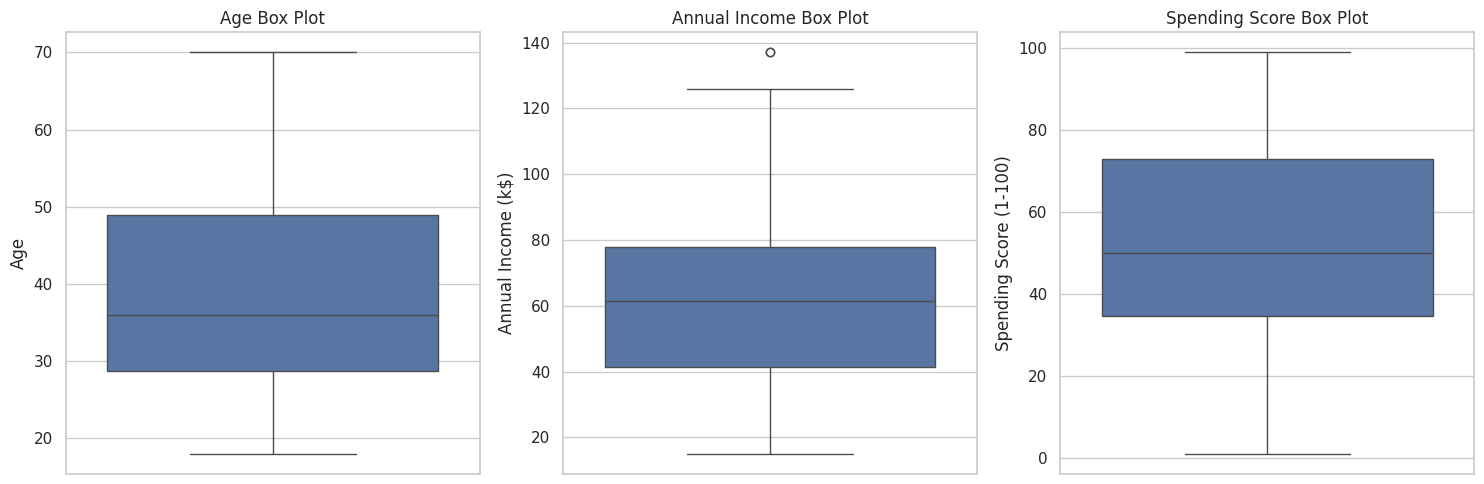

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(df['Age'])
plt.title('Age Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(df['Annual Income (k$)'])
plt.title('Annual Income Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(df['Spending Score (1-100)'])
plt.title('Spending Score Box Plot')

plt.tight_layout()
plt.show()

In [268]:
X_pca = PCA(n_components=3).fit_transform(X_scaled) #Gerou resultados piores
silhouette_scores = []
davies_bouldin_scores = []
k_values = range(2, 30)
for i in k_values:
  kmeans = KMeans(n_clusters=i, random_state=42, algorithm='elkan')
  clusters = kmeans.fit_predict(X_scaled)

  silhouette_avg = silhouette_score(X_scaled, clusters)
  davies_bouldin_index = davies_bouldin_score(X_scaled, clusters)

  davies_bouldin_scores.append(davies_bouldin_index)
  silhouette_scores.append(silhouette_avg)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

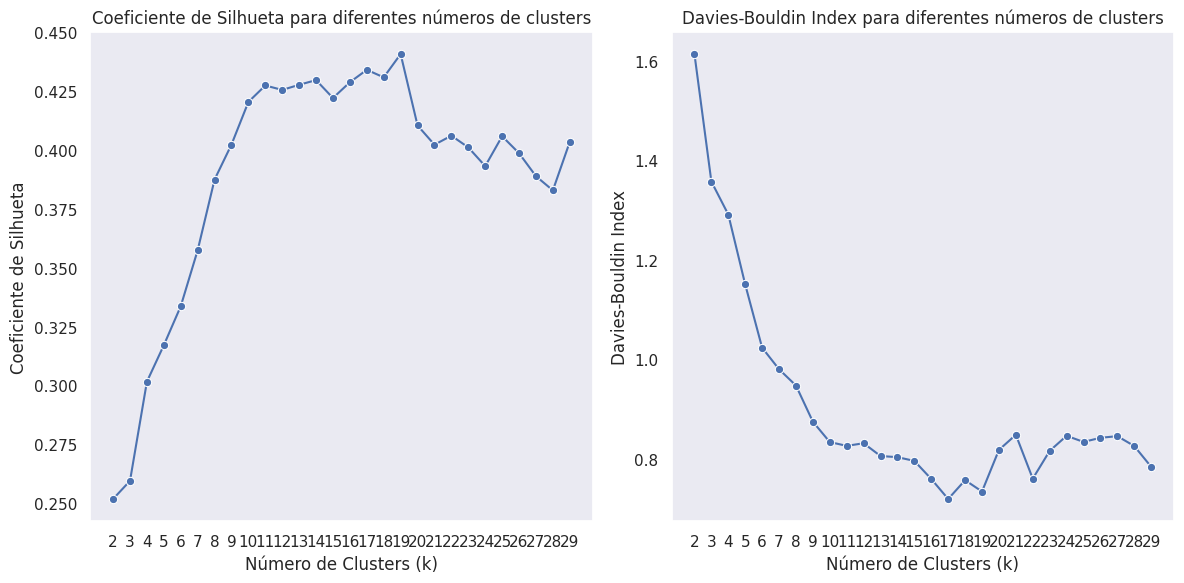

0.44064756728117954
0.719281177914484


In [269]:
# Definindo o estilo do seaborn
sns.set()

# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha e 2 colunas

# Primeiro gráfico: Coeficiente de Silhueta
sns.lineplot(x=k_values, y=silhouette_scores, marker='o', ax=axs[0])
axs[0].set_title('Coeficiente de Silhueta para diferentes números de clusters')
axs[0].set_xlabel('Número de Clusters (k)')
axs[0].set_ylabel('Coeficiente de Silhueta')
axs[0].set_xticks(k_values)
axs[0].grid()

# Segundo gráfico: Davies-Bouldin Index
sns.lineplot(x=range(2, 30), y=davies_bouldin_scores, marker='o', ax=axs[1])
axs[1].set_title('Davies-Bouldin Index para diferentes números de clusters')
axs[1].set_xlabel('Número de Clusters (k)')
axs[1].set_ylabel('Davies-Bouldin Index')
axs[1].set_xticks(range(2, 30))
axs[1].grid()

# Ajustando o layout
plt.tight_layout()

# Mostrando os gráficos
plt.show()

# Imprimindo os resultados
print(max(silhouette_scores))
print(min(davies_bouldin_scores))


In [ ]:
kmeans = KMeans(n_clusters=17, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


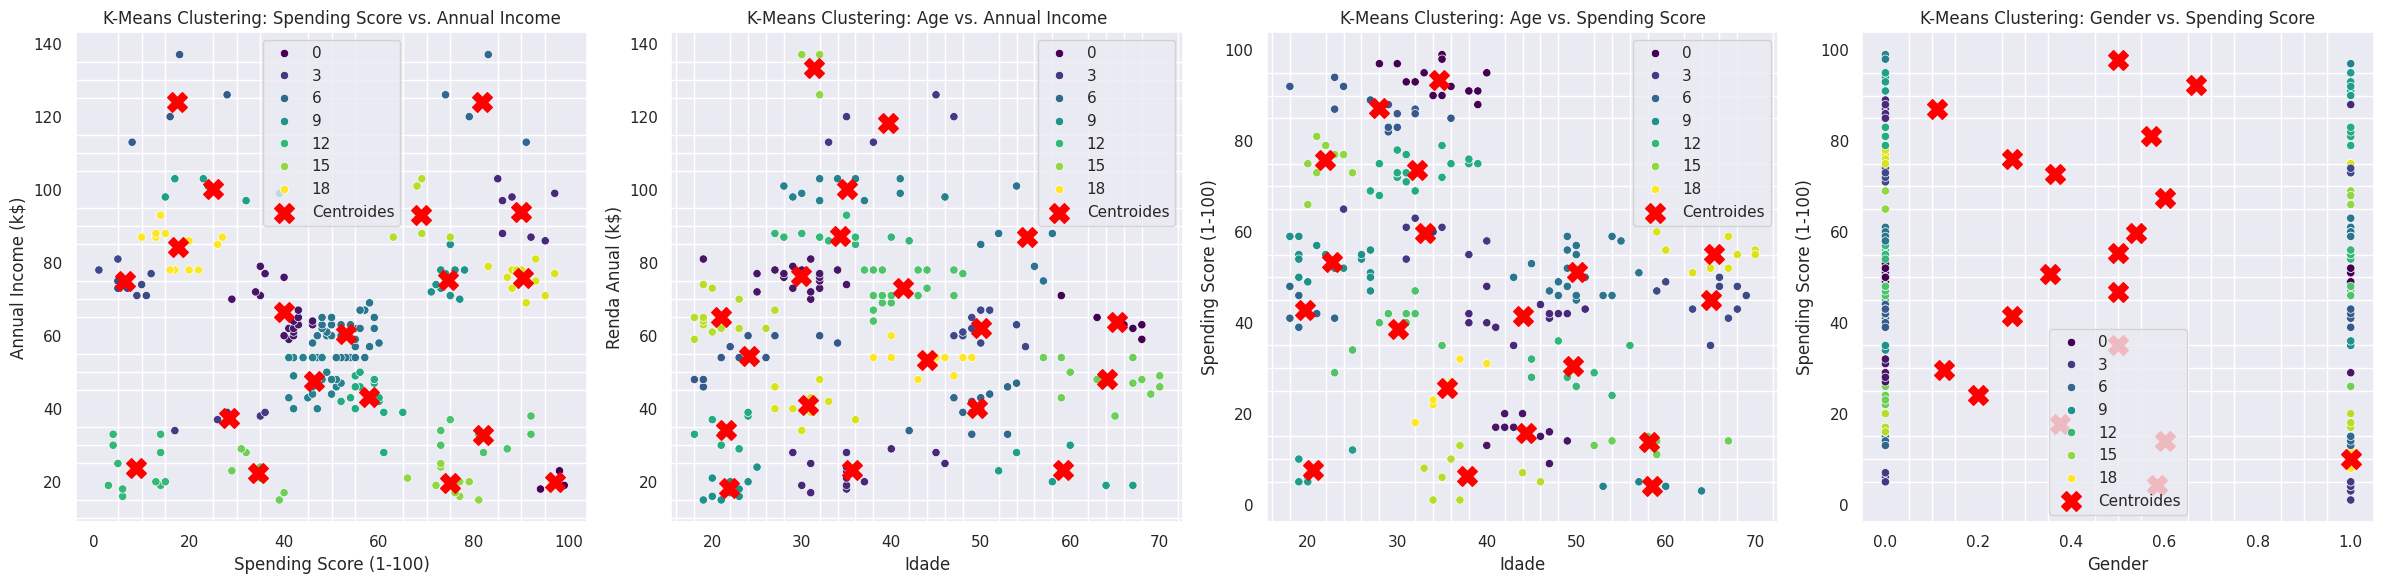

In [271]:
n_clusters = 19

# Clustering Spending Score vs. Annual Income
kmeans1 = KMeans(n_clusters=n_clusters, random_state=42)
kmeans1.fit(df[['Spending Score (1-100)', 'Annual Income (k$)']])
clusters1 = kmeans1.labels_

# Clustering Age vs. Annual Income
kmeans2 = KMeans(n_clusters=n_clusters, random_state=42)
kmeans2.fit(df[['Age', 'Annual Income (k$)']])
clusters2 = kmeans2.labels_

# Clustering Age vs. Spending Score
kmeans3 = KMeans(n_clusters=n_clusters, random_state=42)
kmeans3.fit(df[['Age', 'Spending Score (1-100)']])
clusters3 = kmeans3.labels_

# Clustering Gender vs. Spending Score
kmeans4 = KMeans(n_clusters=n_clusters, random_state=42)
kmeans4.fit(df[['Gender', 'Spending Score (1-100)']])
clusters4 = kmeans4.labels_

# Criando a figura e os subplots
fig, axs = plt.subplots(1, 4, figsize=(24, 6))  # 1 linha e 4 colunas

# Gráfico 1: Spending Score vs. Annual Income
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)',
                hue=clusters1, data=df, palette='viridis', ax=axs[0])
axs[0].scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1],
                s=200, c='red', label='Centroides', marker='X')
axs[0].set_title('K-Means Clustering: Spending Score vs. Annual Income')
axs[0].set_xlabel('Spending Score (1-100)')
axs[0].set_ylabel('Annual Income (k$)')
axs[0].grid(which='both')
axs[0].minorticks_on()
axs[0].legend()

# Gráfico 2: Age vs. Annual Income
sns.scatterplot(x='Age', y='Annual Income (k$)',
                hue=clusters2, data=df, palette='viridis', ax=axs[1])
axs[1].scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1],
                s=200, c='red', label='Centroides', marker='X')
axs[1].set_title('K-Means Clustering: Age vs. Annual Income')
axs[1].set_xlabel('Idade')
axs[1].set_ylabel('Renda Anual (k$)')
axs[1].grid(which='both')
axs[1].minorticks_on()
axs[1].legend()

# Gráfico 3: Age vs. Spending Score
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                hue=clusters3, data=df, palette='viridis', ax=axs[2])
axs[2].scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1],
                s=200, c='red', label='Centroides', marker='X')
axs[2].set_title('K-Means Clustering: Age vs. Spending Score')
axs[2].set_xlabel('Idade')
axs[2].set_ylabel('Spending Score (1-100)')
axs[2].grid(which='both')
axs[2].minorticks_on()
axs[2].legend()

# Gráfico 4: Gender vs. Spending Score
sns.scatterplot(x='Gender', y='Spending Score (1-100)',
                hue=clusters4, data=df, palette='viridis', ax=axs[3])
axs[3].scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1],
                s=200, c='red', label='Centroides', marker='X')
axs[3].set_title('K-Means Clustering: Gender vs. Spending Score')
axs[3].set_xlabel('Gender')
axs[3].set_ylabel('Spending Score (1-100)')
axs[3].grid(which='both')
axs[3].minorticks_on()
axs[3].legend()

plt.tight_layout()
plt.show()


In [251]:
X_pca = PCA(n_components=3).fit_transform(X_scaled) #Gerou resultados piores


silhouette_scores = []
davies_bouldin_scores = []
ac_values = range(2, 30)
for i in ac_values:
  model = AgglomerativeClustering(n_clusters=i, metric = 'manhattan', linkage = 'average')
  labels = model.fit_predict(X_scaled)

  silhouette_avg = silhouette_score(X_scaled, labels)
  davies_bouldin_index = davies_bouldin_score(X_scaled, labels)
  davies_bouldin_scores.append(davies_bouldin_index)
  silhouette_scores.append(silhouette_avg)


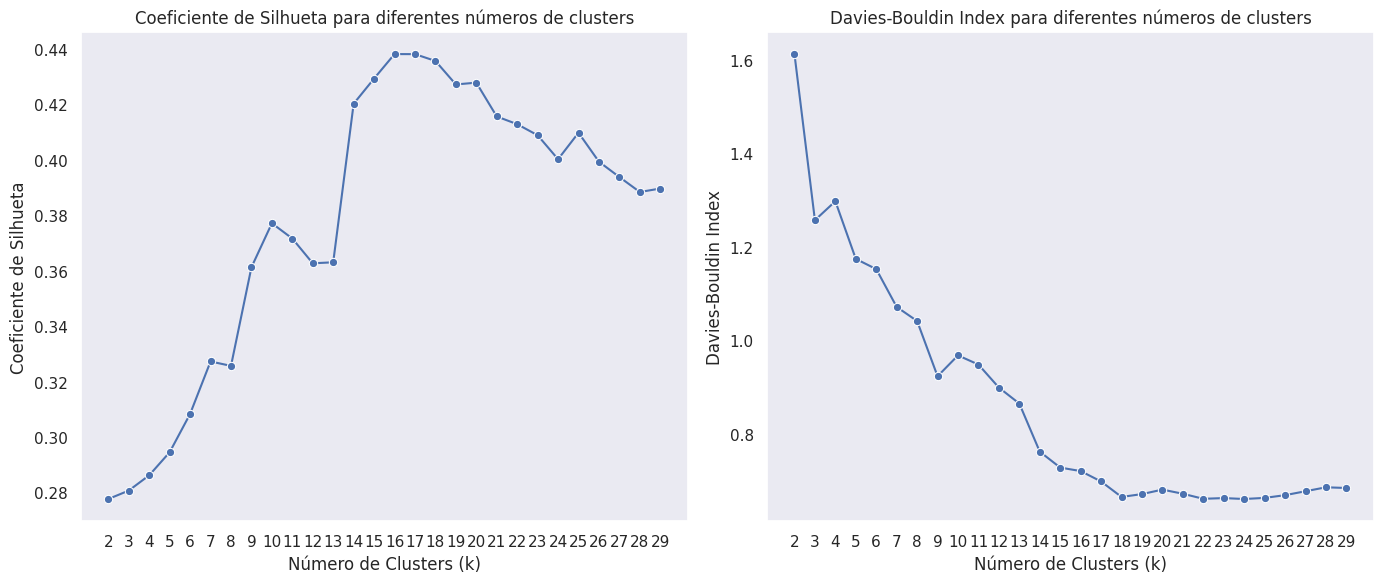

0.43814025009016966
0.6610113364439323


In [252]:
sns.set()

fig, axs = plt.subplots(1, 2, figsize=(14, 6))


sns.lineplot(x=list(ac_values), y=silhouette_scores, marker='o', ax=axs[0])
axs[0].set_title('Coeficiente de Silhueta para diferentes números de clusters')
axs[0].set_xlabel('Número de Clusters (k)')
axs[0].set_ylabel('Coeficiente de Silhueta')
axs[0].set_xticks(list(ac_values))
axs[0].grid()


sns.lineplot(x=list(ac_values), y=davies_bouldin_scores, marker='o', ax=axs[1])
axs[1].set_title('Davies-Bouldin Index para diferentes números de clusters')
axs[1].set_xlabel('Número de Clusters (k)')
axs[1].set_ylabel('Davies-Bouldin Index')
axs[1].set_xticks(list(ac_values))
axs[1].grid()

plt.tight_layout()


plt.show()

print(max(silhouette_scores))
print(min(davies_bouldin_scores))

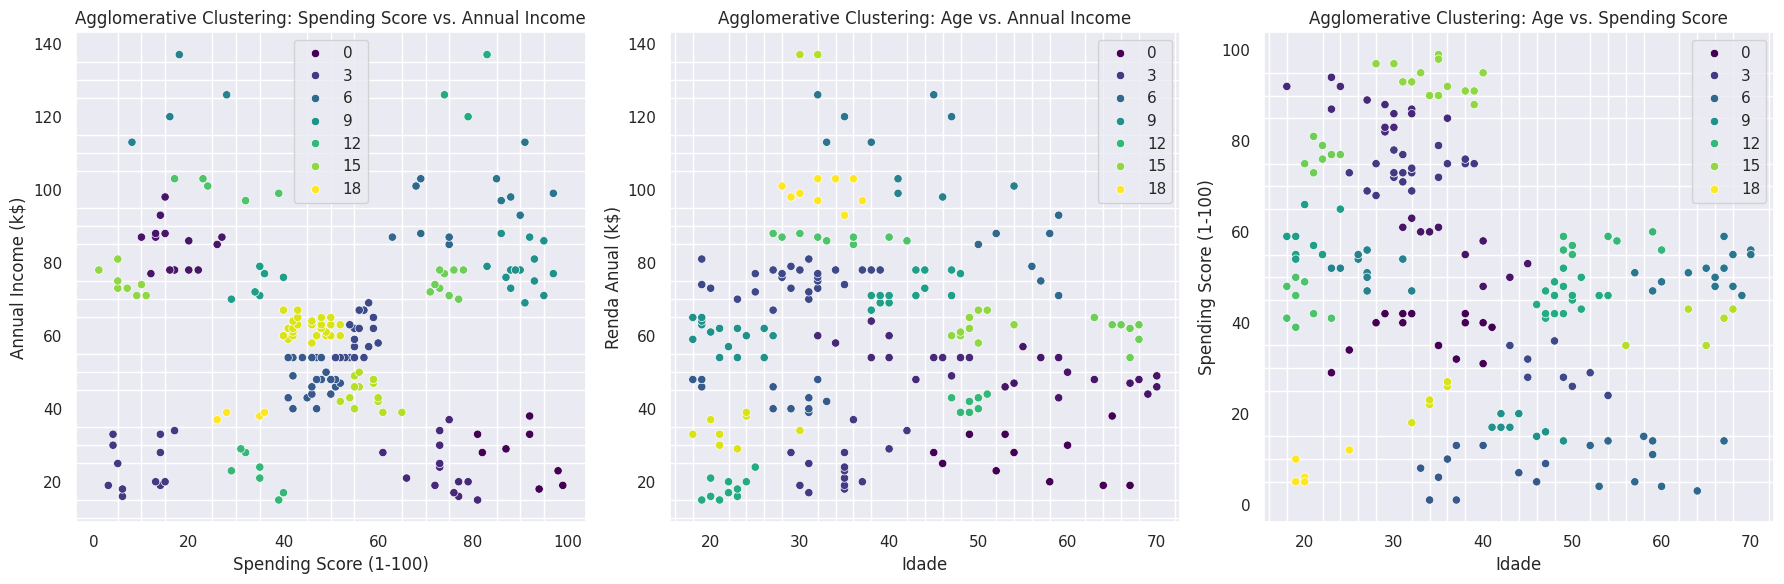

In [ ]:

agglo1 = AgglomerativeClustering(n_clusters=19)
clusters1 = agglo1.fit_predict(df[['Spending Score (1-100)', 'Annual Income (k$)']])


agglo2 = AgglomerativeClustering(n_clusters=19)
clusters2 = agglo2.fit_predict(df[['Age', 'Annual Income (k$)']])


agglo3 = AgglomerativeClustering(n_clusters=19)
clusters3 = agglo3.fit_predict(df[['Age', 'Spending Score (1-100)']])


fig, axs = plt.subplots(1, 3, figsize=(18, 6))


sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)',
                hue=clusters1, data=df, palette='viridis', ax=axs[0])
axs[0].set_title('Agglomerative Clustering: Spending Score vs. Annual Income')
axs[0].set_xlabel('Spending Score (1-100)')
axs[0].set_ylabel('Annual Income (k$)')
axs[0].grid(which='both')
axs[0].minorticks_on()
axs[0].legend()


agglo2 = AgglomerativeClustering(n_clusters=19)
clusters2 = agglo2.fit_predict(df[['Age', 'Annual Income (k$)']])

sns.scatterplot(x='Age', y='Annual Income (k$)',
                hue=clusters2, data=df, palette='viridis', ax=axs[1])
axs[1].set_title('Agglomerative Clustering: Age vs. Annual Income')
axs[1].set_xlabel('Idade')
axs[1].set_ylabel('Renda Anual (k$)')
axs[1].grid(which='both')
axs[1].minorticks_on()
axs[1].legend()



sns.scatterplot(x='Age', y='Spending Score (1-100)',
                hue=clusters3, data=df, palette='viridis', ax=axs[2])
axs[2].set_title('Agglomerative Clustering: Age vs. Spending Score')
axs[2].set_xlabel('Idade')
axs[2].set_ylabel('Spending Score (1-100)')
axs[2].grid(which='both')
axs[2].minorticks_on()
axs[2].legend()


plt.tight_layout()


plt.show()